# Task

Qui invece trovi una super semplice implementazione dell'approccio semi-supervised: [https://github.com/AndreaBorghesi/anomaly_detection_HPC](https://github.com/AndreaBorghesi/anomaly_detection_HPC). Ovviamente funziona solo con dati molto differenti rispetto a quelli su cui agirai te (per quanto sempre provenienti da un sistema HPC).

  

Come discusso, il piano di lavoro (potenzialmente modificabile) è il seguente:

- Prendere confidenza con il dataset di M100

- Considerare solo un mese (almeno per il momento)
- Fare qualche plot, manipolare i dati, capire come estrarre valori per un singolo nodo, capire come sono organizzate i dati per metrica, etc.
- Il paper che descrive il dataset ed il codice di accompagnamento sono fondamentali  
    

- Re-implementare il modello semi-supervised ed applicarlo ai dati
- Re-implementare il modello supervised e fare esperimenti
- Re-implementare il modello unsupervised e fare esperimenti

---

lavorare sui dati di marconi 100. accesso al dataset dal paper. distribuiti su multipl dataset diversi. hanno usato zenodo che permette di salvare dati pubblici. I vari dataset sono divisi in base temporale. Non scaricare subito tutti i dati ma usarne solo una fetta temporale. usarne una parte per training e una parte per testing una volta trainata (fondamentale!). Training + Validazione/testing su un mese di dati va più che bene.  
non ci interessa che si ottengano risultati buoni. mese più recente ha dati più affidabili, comunque guardali e vedi quali sono i più precisi. Li guardi e vedi quali sono. lavorali con dataframe di pandas. Manipolarli con analisi tipo qualche plot. I dati sono divisi per i versi nodi chiamati tipo:  
R (armadio impilati con i nodi)  
xx numero  
N (nodo su quel Rec)  
YY  
  
Il segnale di anomalia è per nodo.  
  
condentrati sui modelli per un nodo . Avrai modelli per ogni nodo.  
  
diverse metriche per nodo. le metriche sono tipo la quantità di dati trasfferiti in usciti e in ingresso, load della cpu, temperature, misurate ogni 5/10 secondi.  
fatti qualche plot nel tempo di temperature, core, nodi. cerca di capire nagios che viene campionato ogni 15 minuti.  
  
poi provare a reimplementare uno dei vari modelli addestrati in passato. Se i risultati non tornano può essere che i dati sono diversi quindi risultati diversi.  
3 macro categorie di approcci: semi-supervised, ossia dare in pasto dati "normali"; nel test set dati normali e anormali.  
inizia col modello semi-supervised, perché c'è codice già pronto. capire come meter dati normali nel training set. vedere cosa succede.  
  
  
Poooi implementiamo modelli supervisionati.  
  
  
Poooi totalmente unsupervised.  
  
  
Keras+tensorflow2 (che contiene keras)  
pytorch  
scegli quello che preferisci tu.

---

2. Attività progettuale sui dati del marconi. Rilevamento anomalie in particolare cercare di farlo con ML. Con difficoltà medio elevata perché non sappiamo cosa fanno i dati. 
oppure usando ML per prevedere la durata dei job.

---
---
# M100 Architecture

- **Supervised learning** 
  In supervised learning, the task of an algorithm is to find a mapping function between the input and the output. From input data, it tries to create a model that reproduces the requested output. This process is called training or training phase. Supervised learning is commonly used for classification tasks, where new observations must be labelled as one of the possible categories. The second phase is called “on-line” phase. Here, the model is used to predict the output on un-labelled data.

- **Unsupervised learning** 
  In unsupervised learning, the task of an algorithm is to find unknown patterns in the data without pre-existing labels. Unsupervised learning algorithms identify similarities in the data and react based on the presence or absence of such similarities. Usually, it is used for dimensionality reduction problems and clustering tasks. Dimensionality reduction problems are those in which data has a large number of features and the algorithm selects in some way a reduced set of features (already existing but also new ones). While a clustering algorithm uses the discovered patterns in the data to split the dataset into sub-groups based on the similarities of their features.
  
- **Deep Learning**
  è una sotto forma di Machine Learning, in quanto si basa sull'apprendimento non supervisionato. Il Deep Learning funziona nelle reti neurali multistrato, che combinano diversi algoritmi e sono modellate sul cervello umano. Ciò consente al sistema di elaborare anche dati non strutturati. L'approccio è particolarmente indicato per compiti complessi, quando non tutti gli aspetti degli oggetti possono essere categorizzati in anticipo. Ad esempio, il Deep Learning può essere utilizzato per riconoscere la lingua parlata in un audio o per riconoscere oggetti in una foto.

- **Reinforcement learning**
  Reinforcement learning is a machine learning technique in which an agent performs actions in the environment. For each performed action, the agent receives a reward. The reward is positive if the action is considered “good” and negative instead. The agent's goal is to maximize the global reward and it learns how to act to increase the reward in particular situations. Reinforcement learning is used very often to resolve planning problems in which the interaction between the agent and the environment is required.

- **Autoencoder (semi-supervised approach)**
  Tipo di DL rete neurale.
  The approach learns the normal state of the supercomputer nodes and after the training phase can be used to discern anomalous conditions from normal behavior; in doing so it relies only on the availability of data characterizing only the normal state of the system. This is different from supervised methods that require datasets with many examples of anomalous states, which are in general very rare and/or hard to obtain.
  The learning task of the autoencoder is to reconstruct the initial input sequence; the internal representation of the autoencoder is constrained in such a way that the model cannot simply learn an identity function (e.g., by projecting the input data on a lower-dimension latent space).
  Adopting a semi-supervised approach proved to lead to inaccurate detection rates (with very high number of false positive).
  Un autoencoder è una rete neurale che ha come obiettivo di comprimere i dati di input in una rappresentazione a bassa dimensionalità e poi ricostruirli come output. L'autoencoder è formato da tre componenti principali:
	  - Encoder: una rete neurale connessa che parte dai dati di input e genera il codice attraverso la compressione.
	  - Codice: una compressione con perdita dei dati di input, chiamata anche "rappresentazione nello spazio latente".
	  - Decoder: una rete neurale connessa, tipicamente l'immagine speculare dell'encoder, che prende il codice e genera l'output.
   L'autoencoder viene usato per ridurre la dimensionalità dei dati, cioè per selezionare le caratteristiche più rilevanti e ridurre il rumore. Questo può migliorare le prestazioni degli algoritmi di apprendimento automatico che usano i dati compressi come input.
   
   ![Pasted image 20231015184216.png](<attachment:Pasted image 20231015184216.png>)
   


- **ODA**
  Operational Data measurement: collection and analysis frameworks to continuously monitor system information data (mostly in the form of multivariate time series data). These tools automatically warn system administrators about critical conditions, which can then be verified by manually inspection.
- **ExaMon**
  is a holistic framework for HPC facility monitoring and maintenance. It uses the MQTT protocol (publish-subscribe).
  At the lowest level, there are collector components (MQTT publishers) to read the data from several sensors scattered across the system and deliver them, in a standardized format, to a specific MQTT subscriber (MQTT2Kairos), implemented to bridge the collectors and the DB.
  There are a few hundreds of metrics collected on each computing nodes, plus dozens covering the racks and rooms.
  Several collectors:
	  - HW resources: PMU, IPMI, GPU, I2C, PMBUS, CPU load of all the cores in the supercomputing nodes, CPU clock, instructions per second, memory accesses (bytes written and read), fan speed, the temperature of the room hosting the system racks, power consumption (at different levels), etc.
	  - job dispatcher (the SW component that handles users requests and decides when each job should start and which resources to allocate), in particular **Slurm**: data regards the job request (job id, job name, job user, job partition/queue) and the requested resources (number of requested nodes, requested cores, requested GPUs and/or other HW accelerators, requested memory, requested wall-time), submission time, execution start time, end time, the set of nodes actually used along with the cores.
	  - SW diagnostic tools, **Nagios**: monitors and visualizes critical IT infrastructure components, providing historical logs of variations in the state of each monitored component, and sends alerts to the management staff, which are then handled by automated scripts that mark the node status depending on the severity of the alert (”Normal”, ”Warning” and ”Critical”). – If the alarm was real, the involved computing nodes have to be removed from production (“*drained*”). This action is registered in Nagios by the "DOWN+DRAIN" state of the node.
	 The data sampling frequency is **15 minutes**.


- **Detecting Anomalies with Nagios** (year 2021)
  An HPC node is put in "DOWN+DRAIN" state when is detached from production, that is only after a system administrator notices the issue; then, when the issue is solved, the node is reactivated. This procedure has a twofold implication:
  i) there is an implicit delay between the insurgence of an anomalous situation and the corresponding labeling;
  ii) labels indicating anomalies are associated to nodes which are in idle state (not only in actual error state), as, during the maintenance performed by system administrator to identify and fix the source of the issue, the node is idle (because no new jobs are submitted on the node). It is required that the model do not simply learn that Nagios fault equals to idleness.
   
   ![Pasted image 20231014195922.png](<attachment:Pasted image 20231014195922.png>)
   
   This approach combines two DL models:
   1) semi-supervised autoencoder deep neural networks. 
      It's trained using only normal data; the network can be used for anomaly detection by observing its reconstruction error computed on new data: if it is greater than a threshold, the new sample is classified as anomalous, normal otherwise.
   2) supervised neural network composed by an autoencoder (distinct from the semi-supervised one) and a series of classification layers.
      The autoencoder is pre-trained in an unsupervised manner with both normal and anomalous data points.
      The two classification layers are trained in supervised manner.
   The two are trained separately, they both produce an anomaly signal (0-normal, 1-faulty) that is combined in a logic-OR fashion (if both signals are normal the output is normal; or else is anomalous). 
   Both models can very well understand if the anomaly has happened, given them all the dataset (mainly recognizing the idle state of the node), and verifying the results comparing them with the Nagios signal.
   The main purpose is to detect in advance the insurgence of anomalies. When the model raises a (FP-Pre) False Positive in the period preceding the Nagios annotated label (two hours earlier), it means that the model have detected in advance the anomaly. With the semi-supervised approach (with variable threshold), while the overall number of false positives diminishes, the FP-Pre actually augments, suggesting that this semi-supervised network might actually anticipate the labels generated by Nagios. The main issue is that the not all false positives before the failures are consecutive, and thus are not used to signal anomalies.





-  **Lambda architecture**
  è un modello di progettazione per i sistemi che devono gestire grandi quantità di dati. Questo approccio cerca di bilanciare latenza, throughput e tolleranza ai guasti usando l'*elaborazione batch* per fornire viste complete e accurate dei dati batch, mentre usa l'*elaborazione stream* per fornire viste dei dati online in tempo reale.
  Si compone di tre livelli:
	   - Il **livello batch** pre-processa i dati, usando un sistema distribuito che può gestire quantità molto grandi di dati. Mira ad ottenere alta precisione, ad esempio correggendo errori o lacune, avendo a disposizione l'intero dataset.  L'output è tipicamente memorizzato in un database in sola lettura, fornendo view per visualizzare tutti i dati.
	   - Il **livello speed** elabora i flussi di dati velocemente e in tempo reale, senza i requisiti di correttezza/completezza, fornendo viste in tempo reale dei dati più recenti.
	   - Il **livello serving** contiene gli output del batch e speed layer. Risponde alle query dell'utente restituendo delle view.

      ![Pasted image 20231014175605.png](<attachment:Pasted image 20231014175605.png>)


- **Holistic**/Global approach
  Relating to the whole of something or to the total system instead of just to its parts

- **Checkpoint methods**
  can be used to tolerate fail-stop faults, but the introduced overhead increases with the node count (more nodes, more overhead, so no scalability)

- **Anomaly prediction methods**
  can be trained using historical data sets. However, failure events are scarce in supercomputers. This problem is bypassed by either developing an artificial fault injection framework in compute nodes, or using unsupervised or semi-supervised methods trained on the normal node state.

- **Unbalanced supervised learning problem**
  si verifica quando il numero di esempi di una classe è molto più grande o molto più piccolo rispetto al numero di esempi di un'altra classe. Può portare a problemi di classificazione sbilanciati, ossia il modello classifica più spesso la classe maggioritaria rispetto alla classe minoritaria.
  In HPC samples, gli esempi di anomalie sono molto scarsi, poiché la maggior parte dei dati rappresentano casi normali e la classificazione dei dati è un procedimento molto dispendioso per gli amministratori di sistema. 
  Ci sono diversi approcci per affrontare questo problema:
	   - l'**undersampling** della classe maggioritaria e l'**oversampling** della classe minoritaria, iniettando dati artificiali anomali.
	   - l'utilizzo di custom algorithms, che puntano a imparare le caratteristiche della classe maggioritaria e poi riconoscere le anomalie come deviazioni da queste caratteristiche.
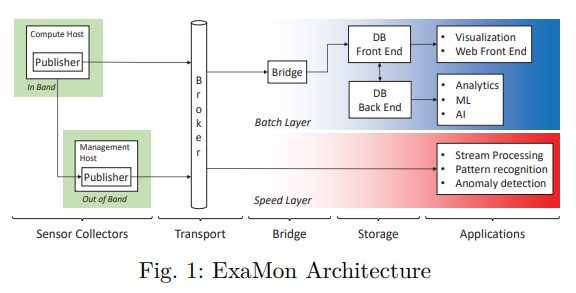
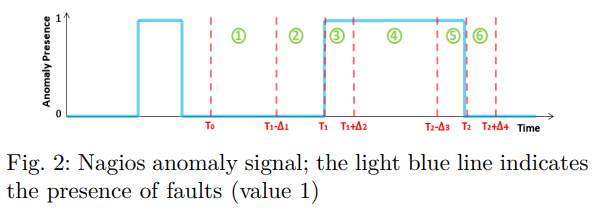
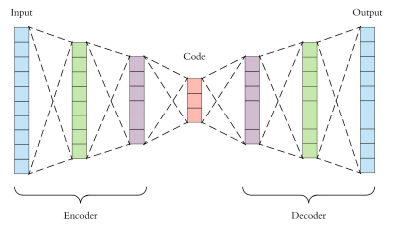